In [85]:
import numpy as np
import pandas as pd
from sympy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def descenso_gradiente(f, variables, x_0, epsilon, max):
    #Creamos una variable simbólica para resolver el problema unidimensional
    t = symbols('t')
    #Creamos un DataFrame para almacenar y mas tarde mostrar los datos de las iteraciones
    data = {'x_k': [], 'x_k+1': [], 'grad(x_k)': [], '|grad(x_k)|': [], 'f(x_k)': [], 't*_k': []}
    #Comenzamos a iterar el método
    while True:
        #Cálculamos el Gradiente de la Función el cual nos dice la dirección de mayor crecimiento
        gradiente = [diff(f, var) for var in variables]
        #Creamos un arreglo el cual nos ayudará a evaluar el gradiente en un punto x_k en específico en R^n
        grad_x_k = np.array([grad.subs(dict(zip(variables, x_0))) for grad in gradiente])
        #Creamos una lista la cual representa nuestra suma con la cual obtendremos el parámetro t optimizando su imagen, su valor depende si vamos a maximizar o minimizar
        aux = [x + t * grad_x for x, grad_x in zip(x_0, grad_x_k)] if max else [x - t * grad_x for x, grad_x in zip(x_0, grad_x_k)]
        #Creamos un arreglo el cual es la función evaluada en nuestro problema auxiliar unidimensional
        f_aux = f.subs(dict(zip(variables, aux)))
        #Cálculamos la primera y segunda derivada del problema unidimensional
        f_aux_prima = diff(f_aux, t)
        f_aux_doble_prima = diff(f_aux_prima, t)
        #Buscamos los puntos críticos que pertenecen a los reales y además son positivos
        puntos_criticos = solve(f_aux_prima, t)
        puntos_criticos_reales = [sol for sol in puntos_criticos if sol.is_real]
        puntos_criticos_positivos = [sol for sol in puntos_criticos_reales if sol >= 0]
        #Inicializamos la variable t* donde guardarémos el óptimo del problema unidimensional
        t_estrella = 0
        #Si se trata de un problema de maximización buscamos los puntos críticos donde f"(*t)<=0
        if max:
            for z in puntos_criticos_positivos:
                if f_aux_doble_prima.subs(t, z) <= 0:
                    t_estrella = z
        #Si se trata de un problema de minimización buscamos los puntos críticos donde f"(*t)>=0
        else:
            for z in puntos_criticos_positivos:
                if f_aux_doble_prima.subs(t, z) >= 0:
                    t_estrella = z
        #Actualizamos el valor de la solución al problema original según la *t óptima que hemos encontrado
        x_1 = [x + t_estrella * grad_x for x, grad_x in zip(x_0, grad_x_k)] if max else [x - t_estrella * grad_x for x, grad_x in zip(x_0, grad_x_k)]
        #Guardamos todo en el DataFrame original
        data['x_k'].append(list(x_0))
        data['x_k+1'].append(list(x_1))
        data['grad(x_k)'].append(grad_x_k)
        data['|grad(x_k)|'].append(np.linalg.norm(grad_x_k, ord=np.inf))
        data['f(x_k)'].append(f.subs(dict(zip(variables, x_0))))
        data['t*_k'].append(t_estrella)
        x_0 = x_1
        #Verificamos que el gradiente tenga norma infinito menor a la tolerancia como condición de paro
        if np.linalg.norm(grad_x_k, ord=np.inf) <= epsilon:
            break
    df = pd.DataFrame(data)
    return df

def graficar_3d(f, x_interval, y_interval, resolution=100):
    x, y = symbols('x y')
    x_values = np.linspace(x_interval[0], x_interval[1], resolution)
    y_values = np.linspace(y_interval[0], y_interval[1], resolution)
    X, Y = np.meshgrid(x_values, y_values)
    Z = np.array([[f.subs({x: x_val, y: y_val}) for x_val, y_val in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [86]:
x,y=symbols('x,y')
f=x**4+y**4+2*x**2*y**2-4*x+3
x_0=np.array([1.25,1.25])
descenso_gradiente(f,[x,y],x_0,.00001,False)

,x_k,x_k+1,grad(x_k),|grad(x_k)|,f(x_k),t*_k
0,"[1.25, 1.25]","[0.693003424917116, 0.501348689404726]","[11.6250000000000, 15.6250000000000]",15.6250000000000,7.76562500000000,0.0479136838780975
1,"[0.693003424917116, 0.501348689404726]","[1.04611842728394, 0.238631127643806]","[-1.97198298153194, 1.46715533825976]",1.97198298153194,0.763231086726097,0.179065948171880
2,"[1.04611842728394, 0.238631127643806]","[0.949341861135706, 0.108555097874671]","[0.817620479859286, 1.09895225787537]",1.09895225787537,0.141037734905430,0.118363676708408
3,"[0.949341861135706, 0.108555097874671]","[1.01403182497636, 0.0604257647772234]","[-0.532873734508507, 0.396458058474333]",0.532873734508507,0.0362639667109442,0.121398296916100
4,"[1.01403182497636, 0.0604257647772234]","[0.988317502338532, 0.0258635031672409]","[0.185565684378063, 0.249416242443617]",0.249416242443617,0.00871469426601664,0.138572617690669
5,"[0.988317502338532, 0.0258635031672409]","[1.00354721360893, 0.0145325979820622]","[-0.135914156140757, 0.101120132168733]",0.135914156140757,0.00211973836668822,0.112053900070774
6,"[1.00354721360893, 0.0145325979820622]","[0.997266285730607, 0.00609049061872236]","[0.0435655167857439, 0.0585558021313746]",0.0585558021313746,0.000501114401118898,0.144172004413830
7,"[0.997266285730607, 0.00609049061872236]","[1.00084663873297, 0.00342670798496261]","[-0.0325670039410552, 0.0242298509321450]",0.0325670039410552,0.000118541963710883,0.109938052909182
8,"[1.00084663873297, 0.00342670798496261]","[0.999359814388989, 0.00142828816778018]","[0.0102152778653639, 0.0137302121846328]",0.0137302121846328,2.78277868335511e-5,0.145549084770817
9,"[0.999359814388989, 0.00142828816778018]","[1.00019916893895, 0.000803808382609394]","[-0.00766915552579487, 0.00570585171119041]",0.00766915552579487,6.53277245990565e-6,0.109445498547753


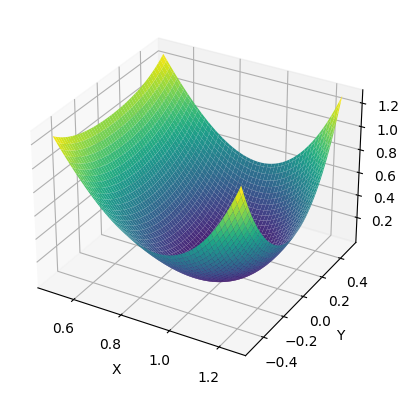

In [87]:
graficar_3d(f,(1/2,1+1/4),(-1/2,1/2))

In [88]:
x,y=symbols('x,y')
f=2*x*y+2*y-x**2-2*y**2
x_0=np.array([0,0])
descenso_gradiente(f,[x,y],x_0,.00001,True)

,x_k,x_k+1,grad(x_k),|grad(x_k)|,f(x_k),t*_k
0,"[0, 0]","[0, 1/2]","[0, 2]",2,0,1/4
1,"[0, 1/2]","[1/2, 1/2]","[1, 0]",1,1/2,1/2
2,"[1/2, 1/2]","[1/2, 3/4]","[0, 1]",1,3/4,1/4
3,"[1/2, 3/4]","[3/4, 3/4]","[1/2, 0]",1/2,7/8,1/2
4,"[3/4, 3/4]","[3/4, 7/8]","[0, 1/2]",1/2,15/16,1/4
5,"[3/4, 7/8]","[7/8, 7/8]","[1/4, 0]",1/4,31/32,1/2
6,"[7/8, 7/8]","[7/8, 15/16]","[0, 1/4]",1/4,63/64,1/4
7,"[7/8, 15/16]","[15/16, 15/16]","[1/8, 0]",1/8,127/128,1/2
8,"[15/16, 15/16]","[15/16, 31/32]","[0, 1/8]",1/8,255/256,1/4
9,"[15/16, 31/32]","[31/32, 31/32]","[1/16, 0]",1/16,511/512,1/2


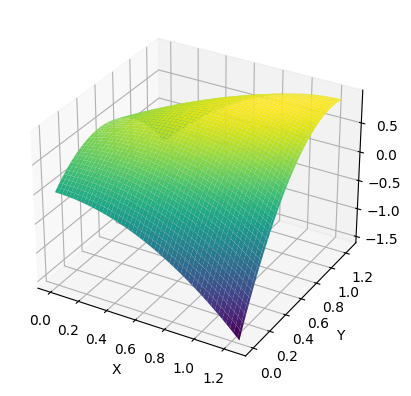

In [89]:
graficar_3d(f,(0,1+1/4),(0,1+1/4))

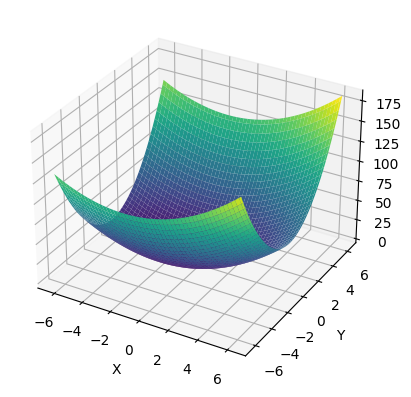

In [90]:
x,y=symbols('x,y')
f=(x+1)**2+3*y**2+y+x
graficar_3d(f,(-2*np.pi,2*np.pi),(-2*np.pi,2*np.pi))

In [91]:
descenso_gradiente(f,[x,y],np.array([2,2]),0.0001,False)

,x_k,x_k+1,grad(x_k),|grad(x_k)|,f(x_k),t*_k
0,"[2, 2]","[349/556, -305/556]","[7, 13]",13,25,109/556
1,"[349/556, -305/556]","[-73805/87848, 21243/87848]","[1183/278, -637/278]",1183/278,2019/556,109/316
2,"[-73805/87848, 21243/87848]","[-26836193/24421744, -5828623/24421744]","[57967/43924, 107653/43924]",107653/43924,-9704005/24421744,109/556
3,"[-26836193/24421744, -5828623/24421744]","[-5307928601/3858635552, -345947761/3858635552]","[9796423/12210872, -5274997/12210872]",9796423/12210872,-1240977827261/1072700683456,109/316
4,"[-5307928601/3858635552, -345947761/3858635552]","[-1527926846321/1072700683456, -193344197295/1...","[480024727/1929317776, 891474493/1929317776]",891474493/1929317776,-61255564668111285/47117304820121344,109/556
5,"[-1527926846321/1072700683456, -193344197295/1...","[-250254977214785/169486707986048, -2578701790...","[81124178863/536350341728, -43682250157/536350...",81124178863/536350341728,-2746460125288076303341/2069580496919009913856,109/316
6,"[-250254977214785/169486707986048, -2578701790...","[-70004167905017513/47117304820121344, -797346...","[3975084764287/84743353993024, 7382300276533/8...",7382300276533/84743353993024,-121098179833089587014059365/90904253746670591...,109/556
7,"[-70004167905017513/47117304820121344, -797346...","[-11133883565435697881/7444534161579172352, -1...","[671789325164503/23558652410060672, -361732713...",671789325164503/23558652410060672,-5322947782254588058428394504221/3992878441568...,109/316
8,"[-11133883565435697881/7444534161579172352, -1...",[-3098807657976827621441/206958049691900991385...,"[32917676933060647/3722267080789586176, 611328...",61132828589969773/3722267080789586176,-233836885641963949237588428969716245/17538319...,109/556
9,[-3098807657976827621441/206958049691900991385...,[-490217986487122674366065/3269937185132035663...,"[5563087401687249343/1034790248459504956928, -...",5563087401687249343/1034790248459504956928,-10271314098329765865149200659879654637901/770...,109/316


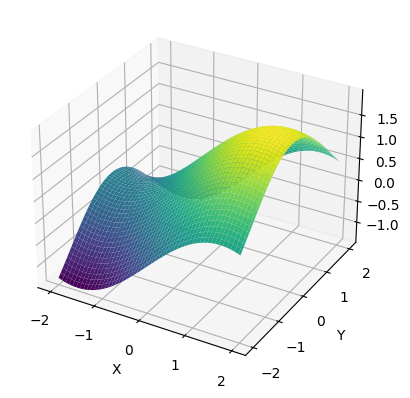

In [92]:
x, y = symbols('x y')
f = sin(x) + cos(y)  
variables = (x, y)
x_0 = (0.0, 0.0)  
epsilon = 0.001
max = True 
result_df = descenso_gradiente(f, variables, x_0, epsilon, max)
graficar_3d(f, (-2, 2), (-2, 2))


In [93]:
result_df

,x_k,x_k+1,grad(x_k),|grad(x_k)|,f(x_k),t*_k
0,"[0.0, 0.0]","[pi/2, 0]","[1, 0]",1,1,pi/2
1,"[pi/2, 0]","[pi/2, 0]","[0, 0]",0,2,0


In [94]:
x,y=symbols('x,y')
f=sin(x)
x_0=np.array([1.25,1.25])
descenso_gradiente(f,[x,y],x_0,.00001,False)

,x_k,x_k+1,grad(x_k),|grad(x_k)|,f(x_k),t*_k
0,"[1.25, 1.25]","[-1.57079632679489, 1.25000000000000]","[0.315322362395269, 0]",0.315322362395269,0.948984619355586,8.94575413353943
1,"[-1.57079632679489, 1.25000000000000]","[-1.57079632679490, 1.25000000000000]","[2.72576759905774e-15, 0]",2.72576759905774e-15,-1.00000000000000,2.42839166625204
